In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


# Import ErichRLib

In [2]:
import EnrichRLib as erl

Gene list may be imported from file or direct entered in code as list object

In [3]:
gl = [  'CD3E', 'BLK', 'PTPN22', 'PAG1', 'CTLA4', 'PIK3CD', 'LAT2', 'CSK', 
        'CD247', 'CD3G', 'THEMIS', 'PSMB8', 'LCP2', 'GATA3', 'LAT', 'SLA2', 
        'SKAP1', 'TRAT1', 'BCL2', 'CD3D', 'THY1','RUNX1', 'BLK', 'PTPN22']


# Fetching gene sets from Enrichr website 

In [4]:
# sub directory where gene sets in .gmt format will be placed
lib_dir='_tmp'

# List of gene sets to fetch, by default all gene sets will be fetched
gss = [ 
       'GO_Biological_Process_2018',
       'GO_Cellular_Component_2018',
       'GO_Molecular_Function_2018',
       'KEGG_2016',
       'Reactome_2016'
       ]

erl.get_Enrichr(out_dir='_tmp', libs=gss)

Directory  _tmp  already exists
GO_Biological_Process_2018  -- DONE
GO_Cellular_Component_2018  -- DONE
GO_Molecular_Function_2018  -- DONE
KEGG_2016  -- DONE
Reactome_2016  -- DONE


# Enrichment of single gene set

In [5]:
# gene set name and file name
lib_dir='_tmp'
gsn = 'Reactome_2016'
gs_fn =lib_dir+'/'+gsn+'.gmt'

# read gmt to python dictionary
gs = erl.read_gmt(gs_fn)

print(gs['Formation of Incision Complex in GG-NER_Homo sapiens_R-HSA-5696395'])

['UBE2I', 'PARP2', 'USP45', 'PARP1', 'CHD1L', 'RPA2', 'RPA3', 'GTF2H1', 'RAD23B', 'GTF2H2', 'RPA1', 'GTF2H3', 'RAD23A', 'PIAS1', 'GTF2H4', 'GTF2H5', 'PIAS3', 'RBX1', 'DDB2', 'CUL4B', 'ERCC1', 'CUL4A', 'DDB1', 'CDK7', 'ERCC4', 'ERCC5', 'ERCC2', 'ERCC3', 'UBE2V2', 'UBA52', 'MNAT1', 'UBE2N', 'CETN2', 'CCNH', 'XPA', 'XPC', 'UBC', 'SUMO2', 'SUMO1', 'UBB', 'SUMO3', 'RPS27A', 'RNF111']


### Enrichment run

In [6]:
enr = erl.enrich(gl, gs)

Text(0.5,1,'Reactome_2016')

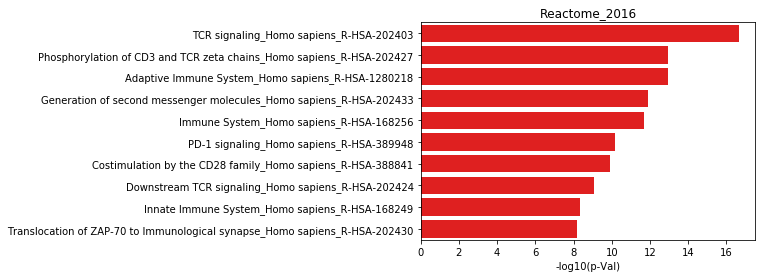

In [7]:
# Plot result as barplot and compare with EnrichR image

import seaborn as sns

ds = enr.head(10)
sns.barplot(y=ds.index,
                x='-log10(p-Val)', 
                color="Red",
                data = ds)
plt.title(gsn)

![title](im/React2016_EnrichTest_bar.png)

In [8]:
ds

,p-Val,num_list,num_term,genes,term_genes,p-adj,-log10(p-adj),-log10(p-Val)
TCR signaling_Homo sapiens_R-HSA-202403,2.109846e-17,10,118,"[PAG1, PSMB8, TRAT1, CD3G, CD3E, CD3D, LAT, LC...","[FBXW11, PSMB9, PSMC6, CD4, PSMC4, PSMC5, PSMC...",4.620562e-15,14.335305,16.675749
Phosphorylation of CD3 and TCR zeta chains_Homo sapiens_R-HSA-202427,1.116760e-13,6,24,"[PAG1, CD3G, CD3E, CD3D, CD247, CSK]","[HLA-DRB5, CD3G, TRBV12-3, PTPRJ, CD3E, CD3D, ...",8.525286e-12,11.069291,12.952040
Adaptive Immune System_Homo sapiens_R-HSA-1280218,1.167847e-13,13,762,"[PAG1, CTLA4, PSMB8, TRAT1, CD3G, CD3E, CD3D, ...","[EGF, WSB1, BAD, AP1S1, FRS2, LNPEP, PSMB9, DY...",8.525286e-12,11.069291,12.932614
Generation of second messenger molecules_Homo sapiens_R-HSA-202433,1.336622e-12,6,35,"[CD3G, CD3E, CD3D, LCP2, LAT, CD247]","[HLA-DRB5, VASP, ENAH, ZAP70, LCK, CD4, HLA-DR...",7.318008e-11,10.135607,11.873991
Immune System_Homo sapiens_R-HSA-168256,2.017948e-12,15,1547,"[PAG1, CTLA4, PSMB8, TRAT1, CD3G, CD3E, CD3D, ...","[BAD, FRS3, FRS2, LNPEP, IL31RA, ORAI1, RNF220...",8.838614e-11,10.053616,11.695090
PD-1 signaling_Homo sapiens_R-HSA-389948,6.403149e-11,5,26,"[CSK, CD3G, CD3E, CD3D, CD247]","[HLA-DRB5, PTPN11, PDCD1LG2, LCK, CD4, HLA-DRA...",2.337150e-09,8.631314,10.193606
Costimulation by the CD28 family_Homo sapiens_R-HSA-388841,1.254283e-10,6,72,"[CTLA4, CD3G, CD3E, CD3D, CD247, CSK]","[LYN, PPP2R5C, PTPN11, PPP2R5B, PPP2R5E, PPP2R...",3.924114e-09,8.406258,9.901604
Downstream TCR signaling_Homo sapiens_R-HSA-202424,8.830089e-10,6,99,"[PSMB8, TRAT1, CD3G, CD3E, CD3D, CD247]","[FBXW11, PSMB9, PSMC6, CD4, PSMC4, PSMC5, PSMC...",2.417237e-08,7.616681,9.054035
Innate Immune System_Homo sapiens_R-HSA-168249,4.504628e-09,10,807,"[PSMB8, TRAT1, CD3G, LCP2, LAT, BCL2, LAT2, CS...","[BAD, FRS3, FRS2, GRIN2D, GRIN2C, PSMB9, PSMC6...",1.096126e-07,6.960139,8.346341
Translocation of ZAP-70 to Immunological synapse_Homo sapiens_R-HSA-202430,6.489045e-09,4,21,"[CD3G, CD3E, CD3D, CD247]","[HLA-DRB5, CD3G, TRBV12-3, CD3E, CD3D, ZAP70, ...",1.421101e-07,6.847375,8.187819


![title](im/React2016_EnrichTest_table.png)

# Enrichment of several gene sets: batch analysis

In [9]:
# List of gene sets as above
gss = [ 
       'GO_Biological_Process_2018',
       'GO_Cellular_Component_2018',
       'GO_Molecular_Function_2018',
       'KEGG_2016',
       'Reactome_2016'
       ]

### Batch enrichment 

In [10]:
enrr = erl.enrich_gs(gl,gss, path_lib=lib_dir)

GO_Biological_Process_2018 492
GO_Cellular_Component_2018 21
GO_Molecular_Function_2018 59
KEGG_2016 90
Reactome_2016 219


### Plots 

Text(0.5,1,'All terms')

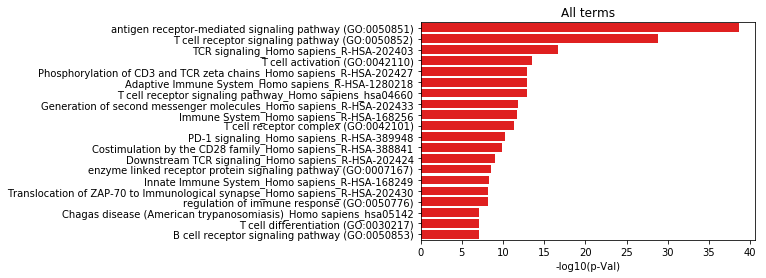

In [11]:
enrr.sort_values('p-Val', axis=0, inplace = True)
ds = enrr.head(20)

f, ax = plt.subplots()
sns.barplot(y=ds.index,
            x='-log10(p-Val)',
            ax = ax, 
            color="Red", 
            data = ds)
ax.set_title('All terms')

# Clustering 

In [12]:
# For futher analysis it is convinient to filter terms by p-value for
enrr = enrr[enrr['p-Val']<0.001]
len(enrr)

105

## Calculate closeness by kappa-score

In [13]:
dd = erl.kappa_matrx(gl,enrr)

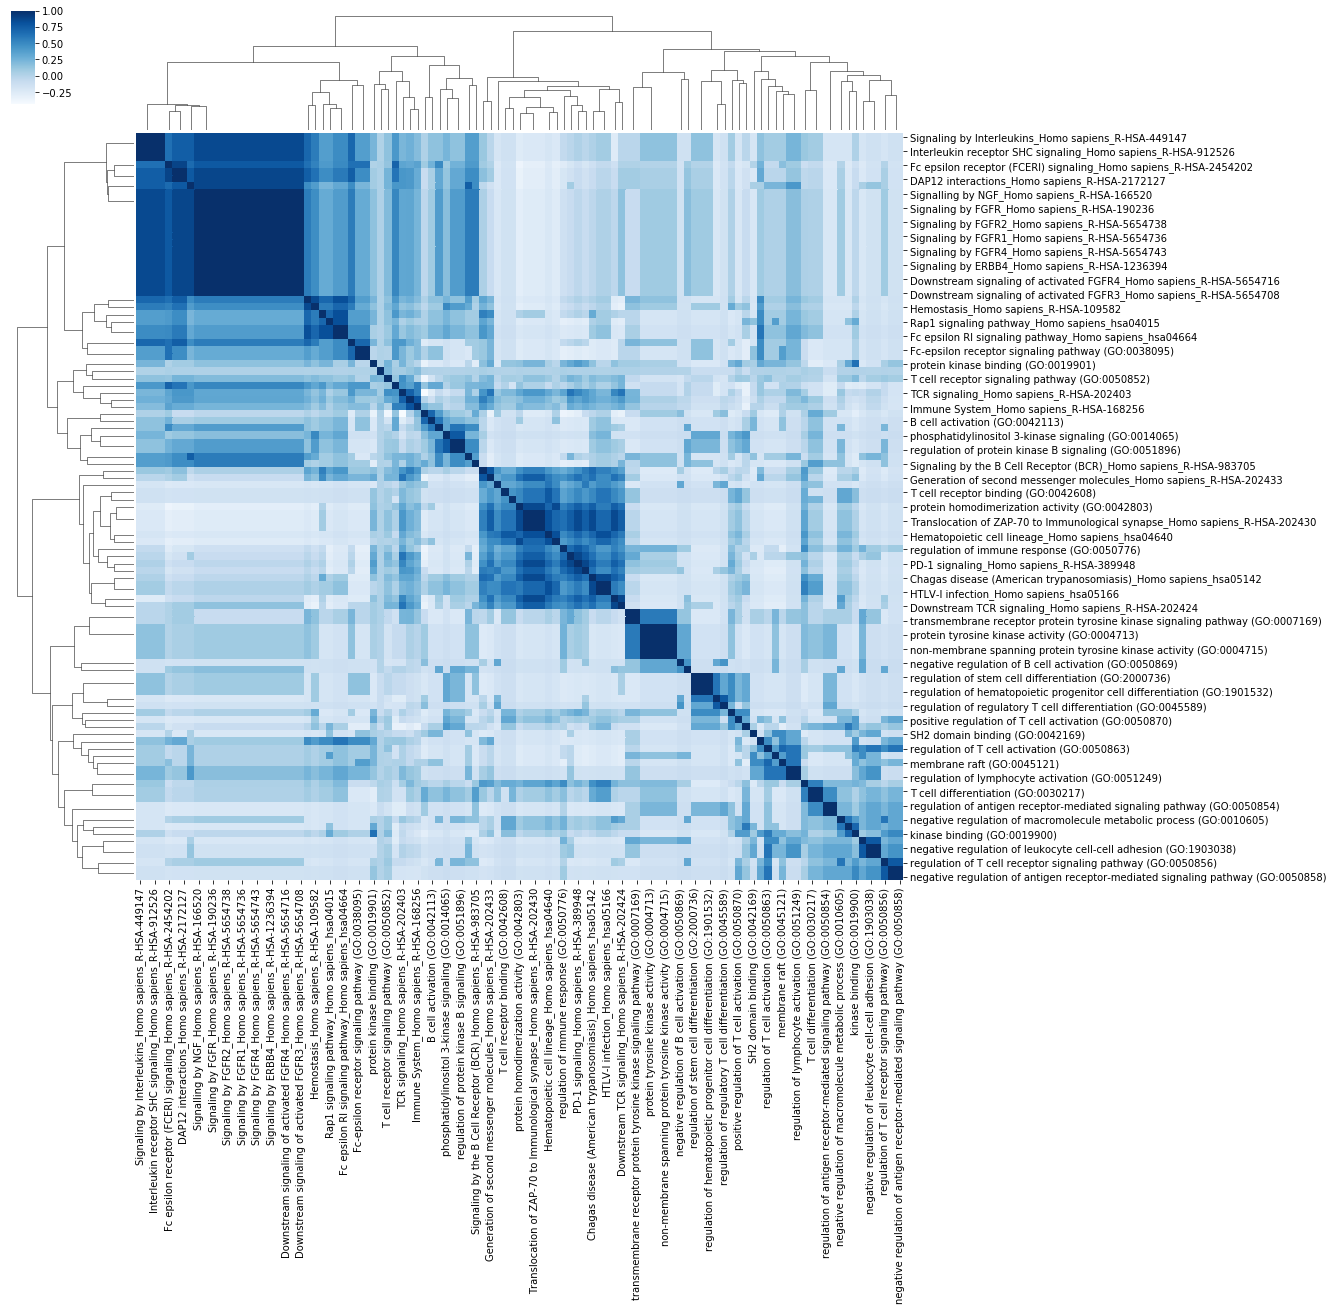

In [14]:
## Show cluster based on kappa-score closeness

grid = sns.clustermap(dd, cmap='Blues', figsize=(16, 16))

## Clastering:  top level

Text(0.5,1,'All terms')

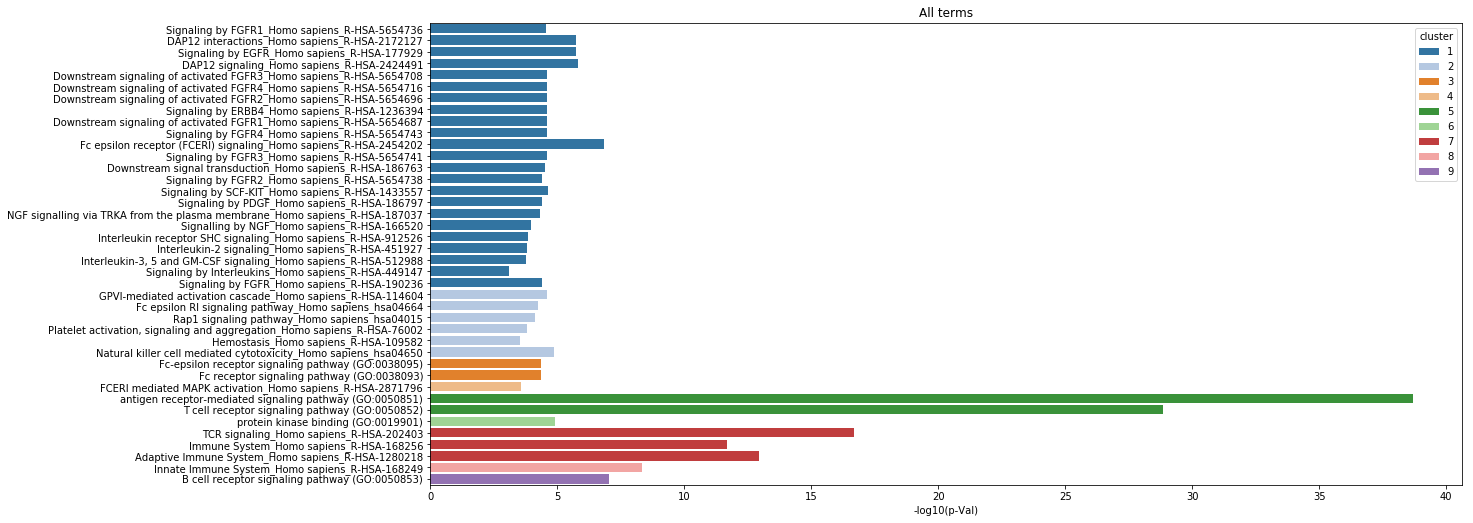

In [15]:
## Cluster: this calculate and add cluster number column
enrr = erl.cluster(gl,enrr)

# Make additional calculation on existing columns for visualization
enrr.loc[:,'ass_genes_percnt'] = 100*enrr.loc[:,'num_list']/enrr.loc[:,'num_term']
enrr.sort_values('cluster', axis=0, inplace = True)

# use consistent discrete palette
cm = 'tab20'

ds = enrr.head(40)

f, ax = plt.subplots(figsize=(18.5, 8.5))
sns.barplot(y=ds.index,
            x='-log10(p-Val)',
            ax = ax, 
            hue ='cluster',
            dodge=False,
            data = ds,
            palette = cm)
ax.set_title('All terms')

Text(0.5,0,'%Genes/Term')

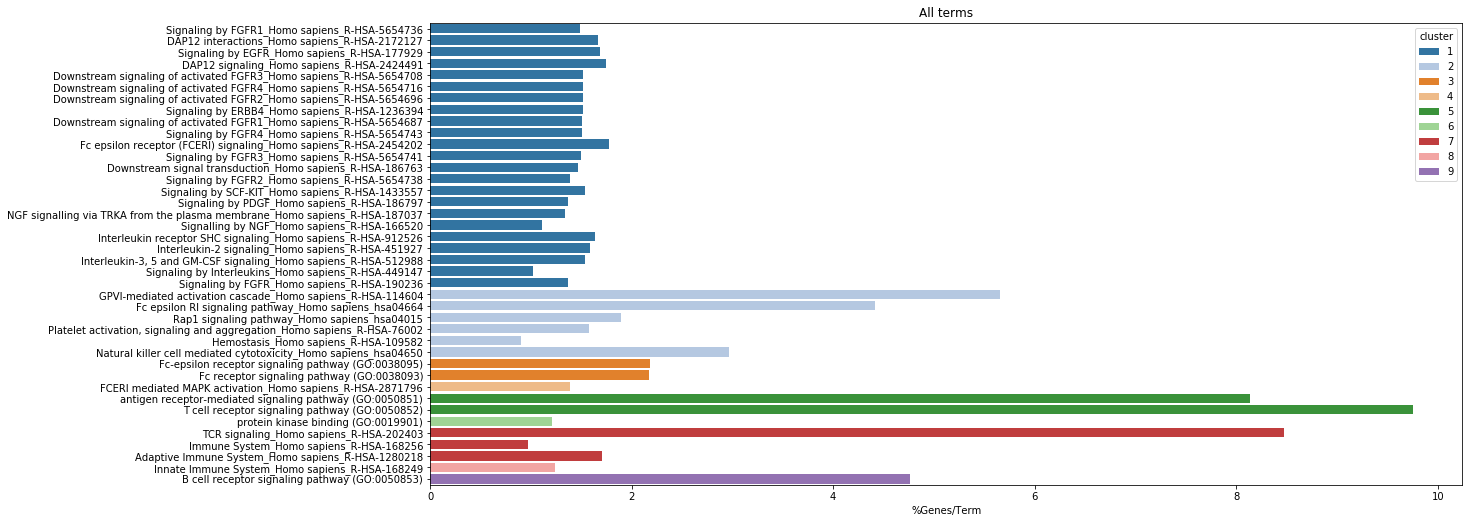

In [16]:
f, ax = plt.subplots(figsize=(18.5, 8.5))
sns.barplot(y=ds.index,
            x='ass_genes_percnt',
            ax = ax, 
            hue ='cluster', 
            dodge=False,
            data = ds,
            palette = cm)
ax.set_title('All terms')
ax.set_xlabel('%Genes/Term')

# Network construction based on cluster

In [17]:
## Graph and network
## control conectivity by kappa score parameter, default kappa=0.4
G,enrrr, nt = erl.make_graph(gl, enrr, kappa=0.4)

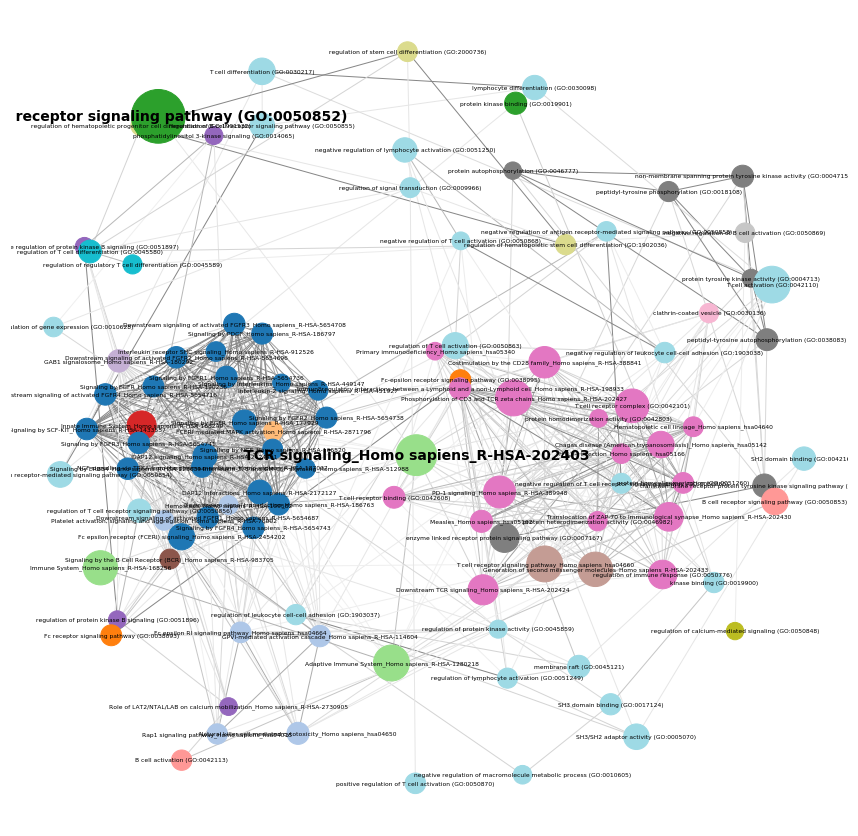

In [18]:
erl.draw_graph(G, spring=0.7, pval_prcnt=0.5, palette=cm)

Text(0.5,1,'All terms')

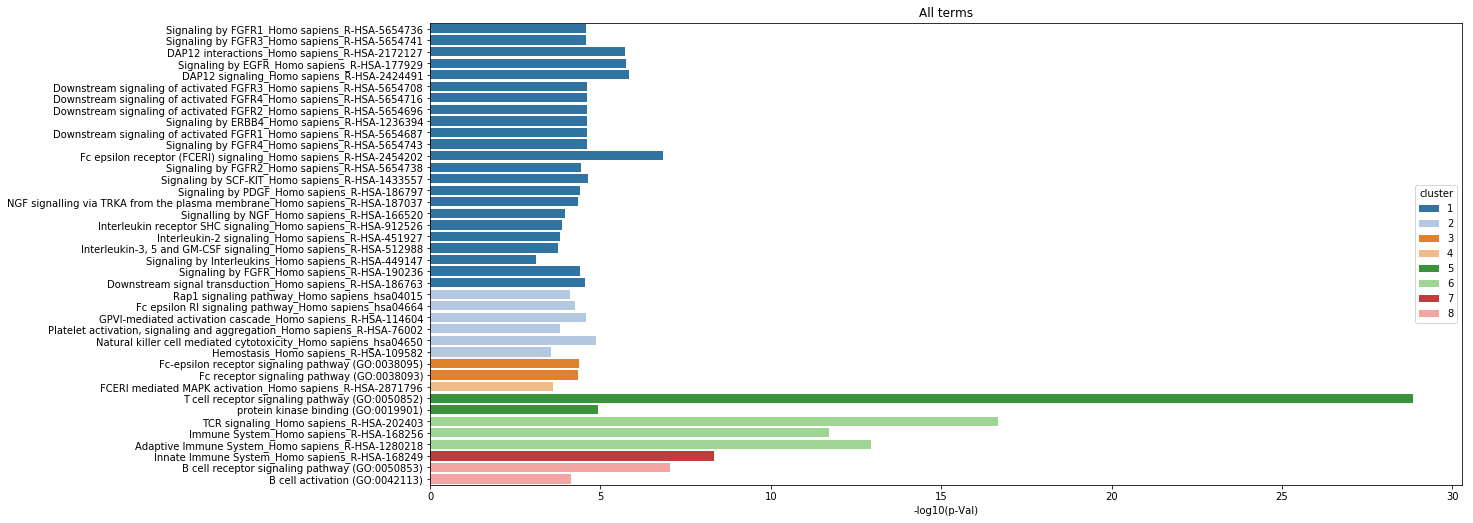

In [19]:
enrrr.sort_values('cluster', axis=0, inplace = True)

# use consistent discrete palette
cm = 'tab20'

dss = enrrr.head(40)

f, ax = plt.subplots(figsize=(18.5, 8.5))
sns.barplot(y=dss.index,
            x='-log10(p-Val)',
            ax = ax, 
            hue ='cluster',
            dodge=False,
            data = dss,
            palette = cm)
ax.set_title('All terms')




#G.nodes['T cell receptor signaling pathway (GO:0050852)']

In [20]:
#G.nodes['antigen receptor-mediated signaling pathway (GO:0050851)']

In [29]:
# setR = set(gl)
# set1 = set(list(enrr['term_genes'].loc['T cell receptor signaling pathway (GO:0050852)']))
# set2 = set(list(enrr['term_genes'].loc['antigen receptor-mediated signaling pathway (GO:0050851)']))

# kp = erl.coeff_kappa(setR,set1,set2)

In [23]:
#enrr.head(40).index
#enrr.loc['T cell receptor signaling pathway (GO:0050852)']


## Exporting network tables for Cytoscape

In [24]:
# If save result and network for Cytoscape
exp_name='GO_KEGG_React'

SAVE = False

if SAVE:
    enrr.to_csv(exp_name+'-enrich.txt', sep="\t")
    nt.to_csv(exp_name+'-network.txt', sep="\t")
    enrrr.to_csv(exp_name+'-network_table.txt', sep="\t")

![title](im/React2016_EnrichTest_net.png)

# ClueGO for same gene list and coresponding gene sets

![title](im/React2016_EnrichTest_netClue.png)

In [28]:

# import networkx as nx
#cl = [G.nodes[v]['cluster'] for v in G] 
# sz = [G.nodes[v]['mlog10pVal']*100 for v in G] 
# shr=10
# # lb_M = {v:v for v in G if G.nodes[v]['num_list']/G.nodes[v]['num_term']>shr}
# # lb_m = {v:v for v in G if G.nodes[v]['num_list']/G.nodes[v]['num_term']<=shr}
# lb_M = {v:v for v in G if G.nodes[v]['mlog10pVal']>shr}
# lb_m = {v:v for v in G if G.nodes[v]['mlog10pVal']<=shr}



# pos=nx.spring_layout(G,k=.2, iterations=100)
# f1, ax1 = plt.subplots(figsize=(20, 20))
#    #pos=nx.kamada_kawai_layout(G)  
# nx.draw(G, pos=pos,
#         #with_labels = True,
#         labels = lb_M,
#         node_color = cl,
#         node_size =  sz,
#         font_size=14,
#         font_weight='bold',
#         cmap = cm) 


# nx.draw(G, pos=pos,
#         #with_labels = True,
#         labels = lb_m,
#         node_color = cl,
#         node_size =  sz,
#         font_size=6,
#         cmap = cm)


In [27]:
#cl
